In [1]:
import segmentation_models as sm
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

import numpy as np
import glob
import os
import cv2


# self-written scripts
import sys
sys.path.insert(0, 'Python_Scripts')

import data_preparation_cnn
import segmentation_modelling_cnn as smc


Segmentation Models: using `keras` framework.


In [2]:
# PARAMETERS
SIZE_X = 128
SIZE_Y = 512

EPOCHS = 20
LEARNING_RATE = 0.005
OPTIMIZER = tf.keras.optimizers.Adam(lr=LEARNING_RATE)

/Users/fabioteichmann/neuefische/projects/CapstoneProject_SteelDefectDetection/.venv/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


---
## Train New Models

With the following line of code, you can generate new models using varying parameters.

In [ ]:
models = smc.build_mask_generating_models(SIZE_X, SIZE_Y, 'dice', EPOCHS, OPTIMIZER)

---

## Using Our Pre-Trained Models

In the following we build use our pre-trained models (1 for each defect class) to demonstrate the outcome. Our fit used the following configuration:

- `Image Width` - 512 pixel
- `Image Height` - 128 pixel
- Model Architecture - a Unet with pre-trained `EfficientNetB5`
- `Loss Function` - Dice loss (custom function)
- `Metrics` - Dice coefficient (custom function)
- `Optimizer` - `adam` with a `learning_rate` of 0.005
- `Epochs` - 20

### Loading Saved Models

In [3]:
models = smc.load_and_compile_dice_models_from_capstone()

Loading model 1...
Metal device set to: Apple M1


2022-03-01 13:53:22.884145: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-01 13:53:22.884896: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Loading model 2...
Loading model 3...
Loading model 4...


### Predict Defect Masks

Using our pre-trained `models` we can generate mask images (1 per defect class) for each test image.

In [4]:
predictions = smc.get_predictions_all_classes(models, SIZE_X, SIZE_Y)

Making predictions for defect class 1:
making predictions...


2022-03-01 13:53:33.860703: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-01 13:53:34.658858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:53:49.166425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:54:03.668225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:54:18.757366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Making predictions for defect class 2:
making predictions...


2022-03-01 13:54:35.606473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:54:40.965468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:54:47.085606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:54:53.870352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Making predictions for defect class 3:
making predictions...


2022-03-01 13:55:10.130554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:56:30.466099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:57:52.432198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 13:59:18.772219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Making predictions for defect class 4:
making predictions...


2022-03-01 14:00:45.613896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:01:00.946519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:01:17.508241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:01:33.516814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


### Visualize some Masks per Defect Class

Once the predicted masks are generated, we can have a look at some mask examples to get a feeling for the performance of our model.

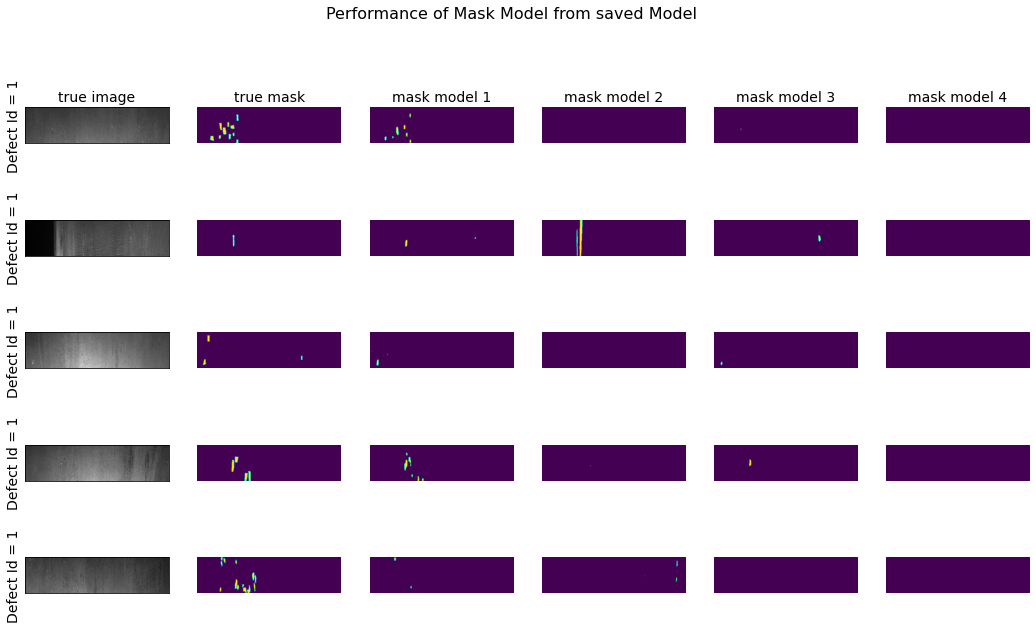

In [5]:
smc.visualize_predictions(predictions, 1, SIZE_X, SIZE_Y)

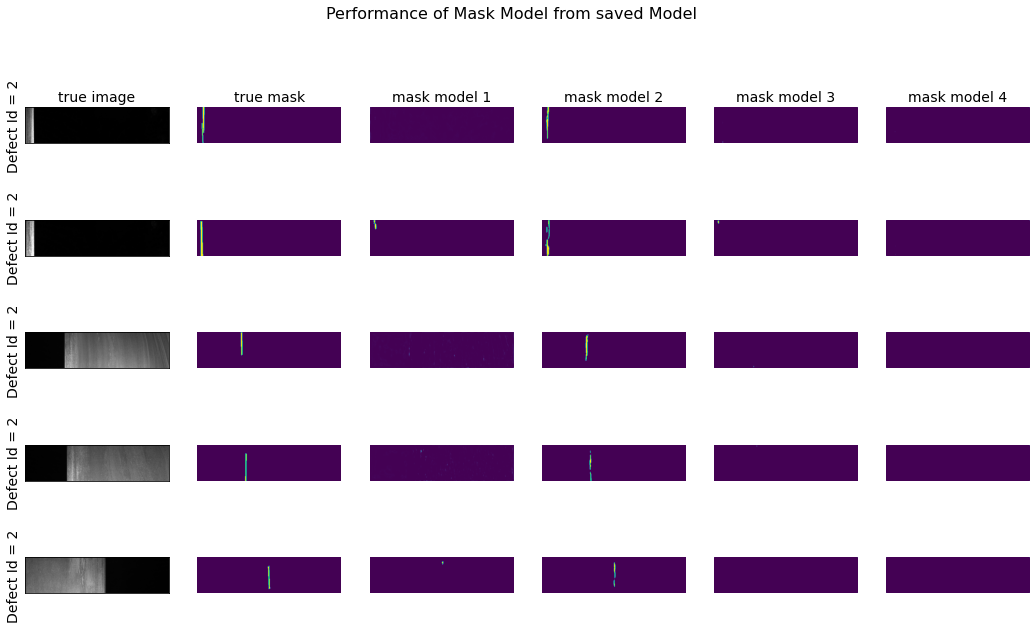

In [6]:
smc.visualize_predictions(predictions, 2, SIZE_X, SIZE_Y)

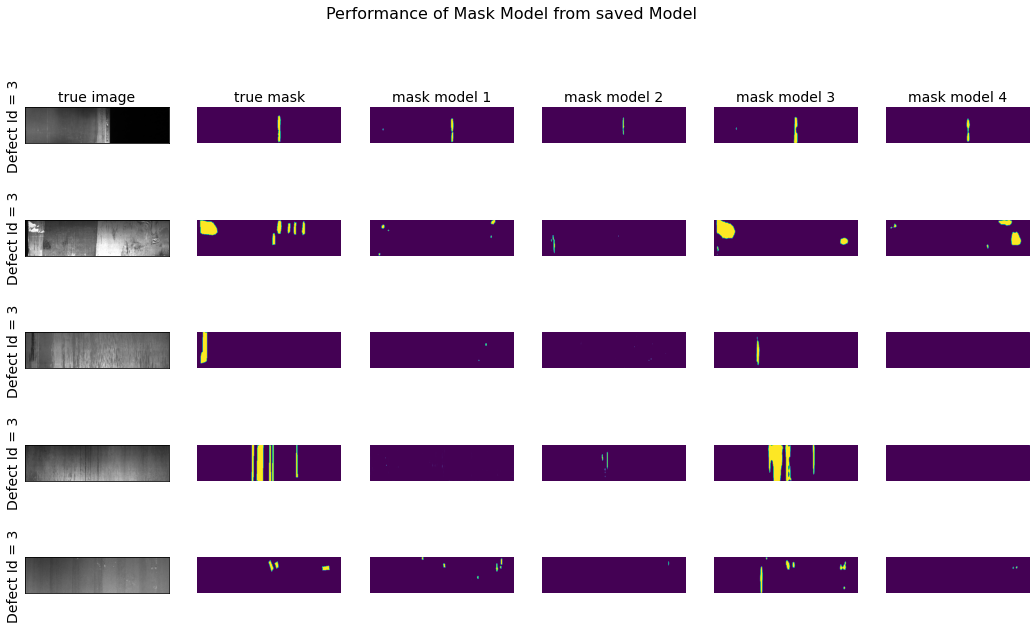

In [7]:
smc.visualize_predictions(predictions, 3, SIZE_X, SIZE_Y)

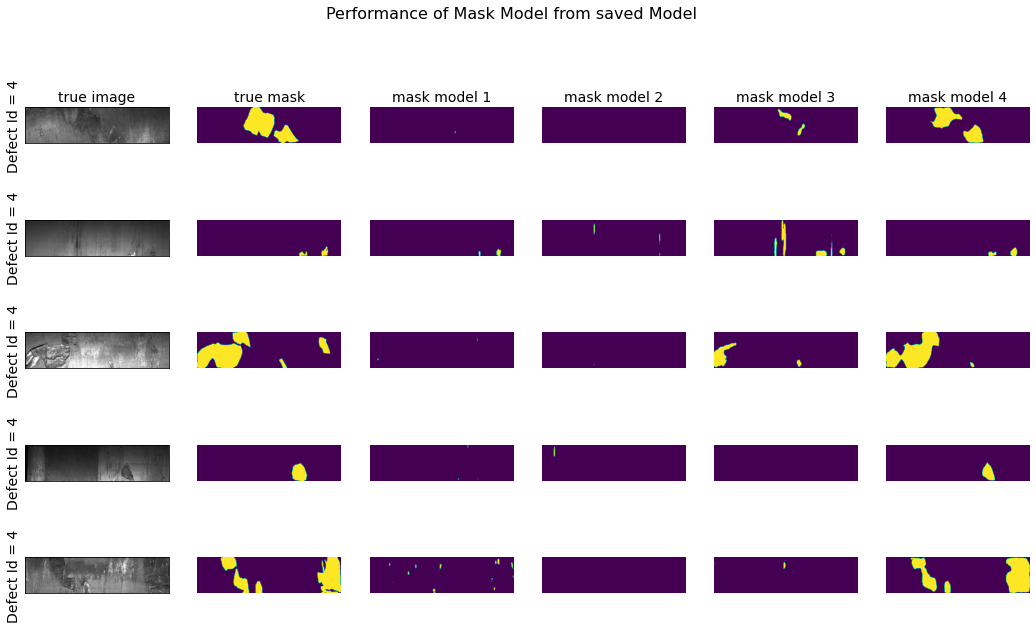

In [8]:
smc.visualize_predictions(predictions, 4, SIZE_X, SIZE_Y)

Now let's have a look at the performance across defect classes side by side.

image indices: [234, 55, 1542, 48]


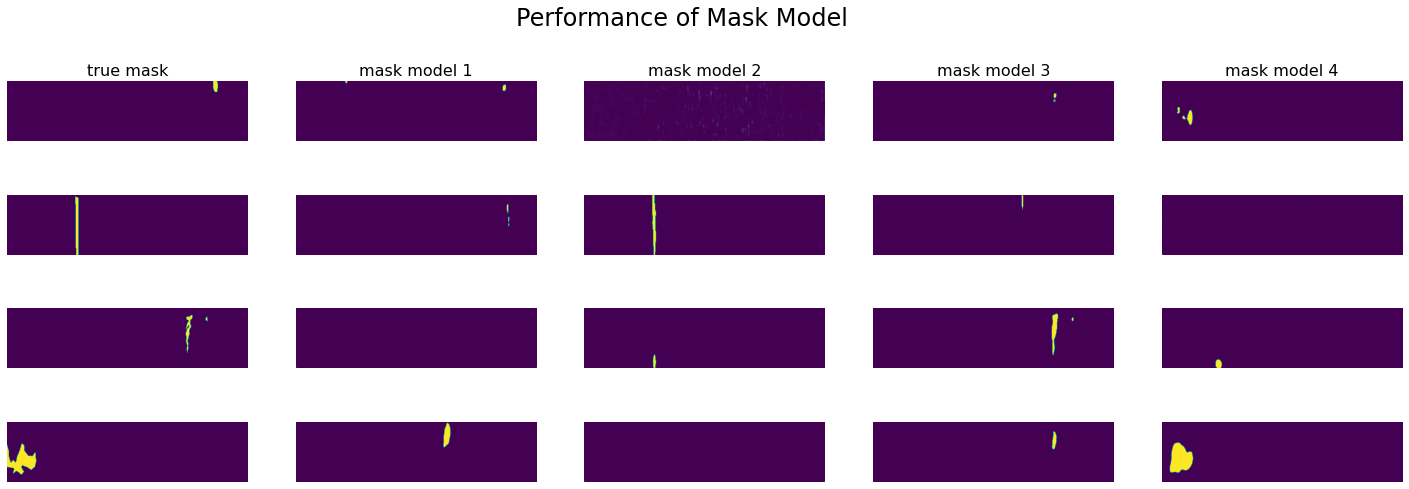

In [9]:
smc.visualize_masks_across_defect_classes(predictions, SIZE_X, SIZE_Y)

---

### Calculating Classification Accuracy

As a measure of how well the masks that our models generate perform as a classifier for the recognized defect class we calculate our own accuracy rate. 

*Base assumption*: the mask that marks most pixels as defective reflects the defect class of the image.

This configuration rules out the identification of several different defects per image (multi-class).

In [10]:
accuracies, weighted_acc = smc.calculate_accuracies_for_masks(models,SIZE_X, SIZE_Y)

Calculating accuracy for defect class 1:
making predictions...


2022-03-01 14:02:41.298386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:02:58.664867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:03:14.944237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:03:32.109891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


calculating accuracy...
Calculating accuracy for defect class 2:
making predictions...


2022-03-01 14:03:54.929961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:04:03.553739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:04:13.805192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:04:24.310975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


calculating accuracy...
Calculating accuracy for defect class 3:
making predictions...


2022-03-01 14:04:45.006556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:06:11.068189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:07:44.678358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:09:14.121632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


calculating accuracy...
Calculating accuracy for defect class 4:
making predictions...


2022-03-01 14:11:02.569251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:11:21.862917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:11:40.450331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-01 14:11:57.500261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


calculating accuracy...

Accuracies: [0.3048327137546468, 0.7837837837837838, 0.8460543337645536, 0.7166666666666667]

Number of images per class: [269, 74, 1546, 240]

------------------------------------------------------------
Weighted accuracy: 0.7609206200093941


Our model performs pretty well, given the imbalanced data set and heterogenous `ClassId` 3. With our model we are able to correctly localise and classify **76%** of images in our scenario.